In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textstat import flesch_reading_ease, flesch_kincaid_grade, gunning_fog
from textblob import TextBlob
import numpy as np
import string

initial_prompt = "Give me longform single text answers for the questions that i ask you.They are not related to each other and dont need to be either. Also tell me which GPT are you"

Starting AI Response Analysis...
Sentence Count :  23
Word Count:  410
Sentence Count :  18
Word Count:  430
Sentence Count :  52
Word Count:  617
Sentence Count :  23
Word Count:  484
Sentence Count :  20
Word Count:  177
Sentence Count :  24
Word Count:  458
Sentence Count :  25
Word Count:  479
Sentence Count :  19
Word Count:  450
Sentence Count :  25
Word Count:  373
Sentence Count :  26
Word Count:  444
Sentence Count :  48
Word Count:  572
Sentence Count :  24
Word Count:  450
Sentence Count :  16
Word Count:  269
Sentence Count :  20
Word Count:  339
Sentence Count :  69
Word Count:  640
Sentence Count :  28
Word Count:  460


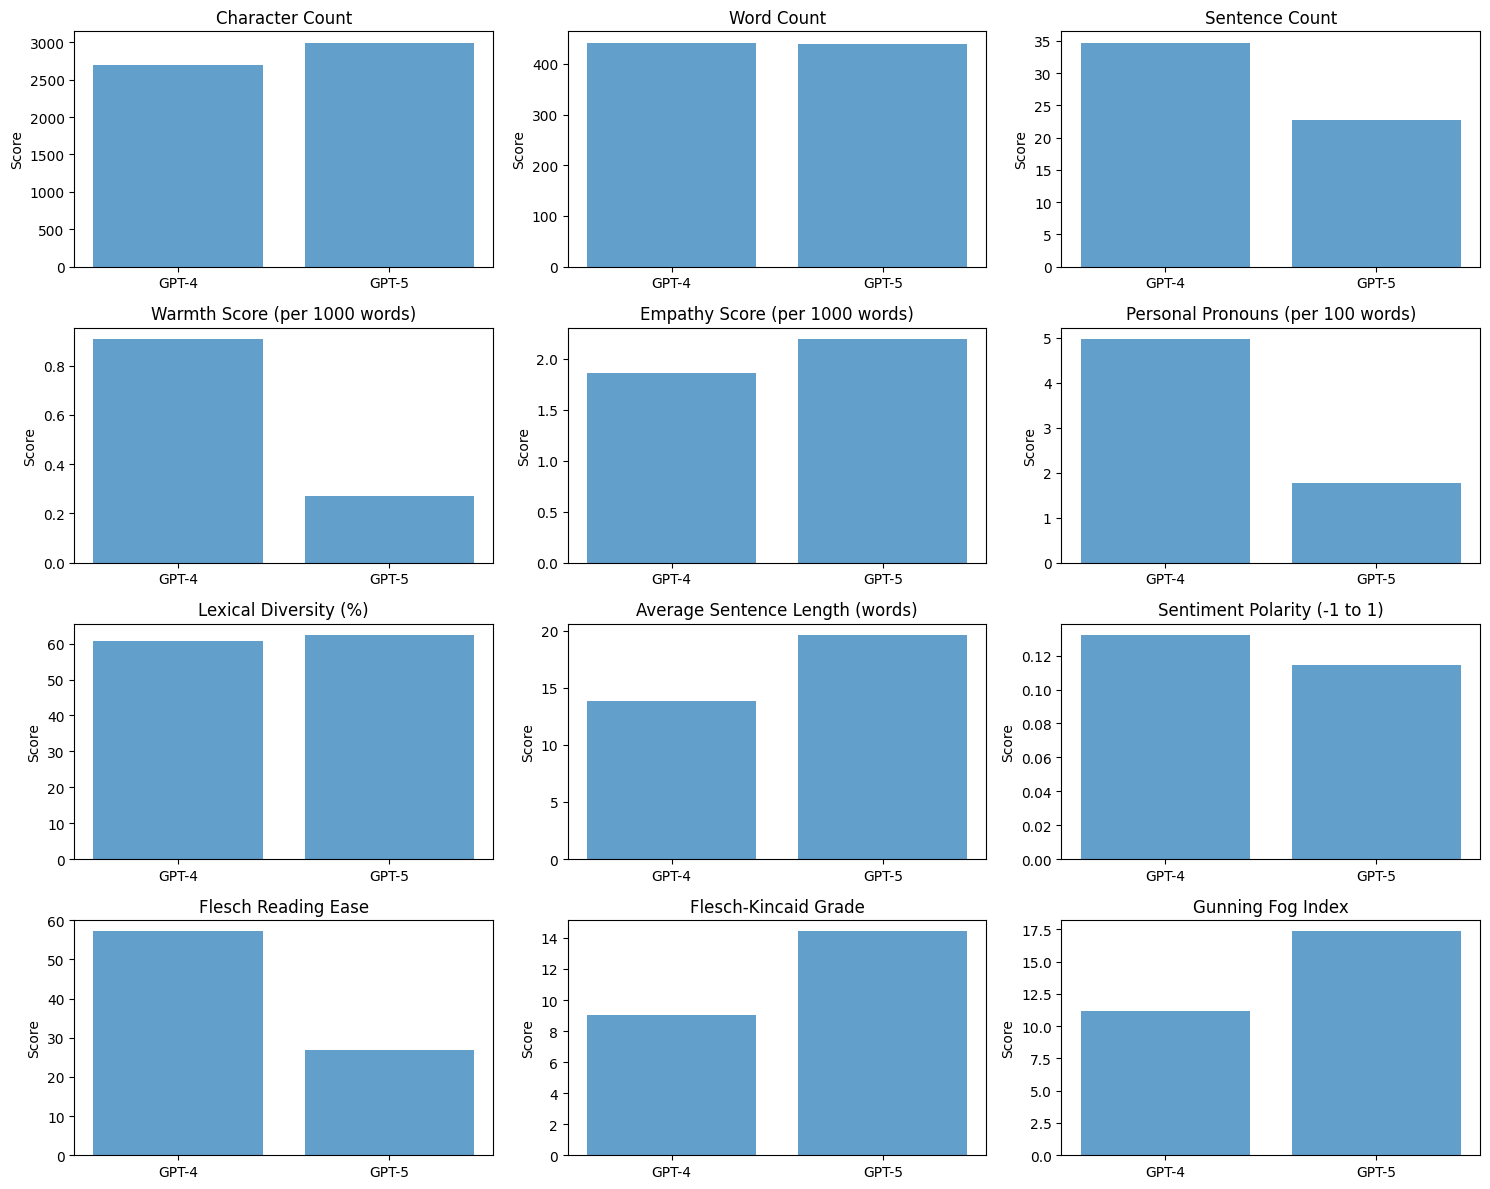


Detailed results saved to 'ai_analysis_results.csv'


In [ ]:
class AiResponseAnalyzer:
    def __init__(self):
        self.warm_words = [
            'i understand', 'i can help', 'let me help', 'happy to', 'absolutely', 'definitely',
            'excited', 'wonderful', 'amazing', 'fantastic', 'delighted', 'thrilled',
            'glad to assist', 'pleased to help', 'sure thing', 'of course', 'you’re very welcome',
            'no problem at all', 'great to hear', 'that’s excellent', 'well done', 'love that',
            'let’s do it', 'sounds great', 'happy to support', 'let’s figure this out together',
            'we’ve got this', 'you’ve got this', 'it’s my pleasure', 'always happy to help',
            'thank you for reaching out', 'great question', 'you’re in good hands',
            'i’m here for you', 'let’s make it work', 'how exciting', 'this is great',
            'let’s tackle this together', 'appreciate you sharing that', 'awesome', 'so glad to hear that'
        ]

        self.empathy_words = [
            'sorry', 'i’m sorry to hear that', 'i understand how you feel', 'that sounds tough',
            'i can imagine', 'must be difficult', 'feel', 'feelings', 'emotions',
            'challenging', 'difficult', 'frustrating', 'stressful', 'overwhelming',
            'hard', 'not easy', 'you’re not alone', 'i hear you', 'that’s completely valid',
            'that makes sense', 'i get that', 'must be exhausting', 'must be upsetting',
            'sounds like a lot', 'you’re dealing with a lot', 'it’s okay to feel that way',
            'that can’t be easy', 'thank you for sharing that', 'it’s understandable',
            'i’m here for you', 'you’re doing your best', 'you’ve been through a lot',
            'tough situation', 'empathize', 'that must be frustrating', 'sounds intense',
            'i appreciate how hard that must be', 'thank you for trusting me with this',
            'completely understandable', 'i know it’s not easy', 'you’re being very strong'
        ]


    def clean_text(self, text):
        if not text:  # Handle empty input gracefully
            return ""

        preserve = ".!?"  # These will NOT be removed
        to_remove = ''.join(c for c in string.punctuation if c not in preserve)
        translator = str.maketrans('', '', to_remove)
    
        cleaned = text.translate(translator)
        
        cleaned = cleaned.lower()
        return cleaned
        
    def sampled_data(self):
        prompts = [
            "Explain machine learning to a beginner",
            "I'm stressed about work, any advice?", 
            "Help me write a creative story",
            "What's quantum computing?",
            "I'm learning Python, any tips?",
            "Give advice on maintaining work-life balance",
            "Explain climate change simply",
            "How to improve public speaking skills?"
        ]
        
        new_response = [
            r"""Machine learning is a field within computer science and artificial intelligence that focuses on creating systems capable of improving their performance by learning from data, rather than relying solely on explicitly programmed instructions. To understand this intuitively, imagine teaching a child to recognize fruit. You could either provide the child with a rigid set of rules—such as “if it is red and round, then it is an apple”—or you could instead show them many examples of apples, oranges, and bananas. Over time, the child begins to recognize patterns and can distinguish fruits they have never seen before. Machine learning works in a similar way: instead of hardcoding every possible rule, we provide algorithms with large amounts of data, and through statistical methods they learn patterns that allow them to make predictions, classifications, or decisions.There are several main categories of machine learning. The first is supervised learning, where the system is trained on labeled data. For example, if we want an algorithm to distinguish between cats and dogs, we provide many images labeled as “cat” or “dog.” The model learns the relationship between features (like shape, color, or texture) and the labels, and then applies this knowledge to new, unseen data. The second is unsupervised learning, where the data has no labels, and the algorithm must find structure on its own—for instance, clustering similar customers together based on purchasing habits without knowing beforehand which groups exist. A third category is reinforcement learning, where an agent learns by interacting with an environment, receiving feedback in the form of rewards or penalties, much like how animals learn behaviors through trial and error. The power of machine learning lies in its ability to generalize from past data to future situations. It underpins many technologies we use daily, such as recommendation systems on streaming platforms, spam filters in email, fraud detection in banking, medical diagnostics, and even autonomous driving. However, it also comes with challenges. Machine learning models require large and representative datasets, can be biased if the data itself is biased, and often operate as “black boxes,” meaning their decision-making processes are difficult to interpret. In short, machine learning can be thought of as giving computers the ability to learn from experience. It is not about programming every step in advance but about enabling systems to discover patterns, make predictions, and adapt to new information in ways that resemble learning in humans, though based on mathematical and computational principles. Would you like me to also explain some of the mathematics behind how machine learning works, such as how algorithms “fit” a model to data?""",

            r"""Work-related stress is a common and often deeply felt experience, particularly in professional environments that demand sustained performance, long hours, or high accountability. Addressing it effectively involves not only managing immediate symptoms but also adopting longer-term strategies that enhance resilience, balance, and perspective. A useful first step is to carefully distinguish between factors that are within your control and those that are not. Often, stress escalates when individuals attempt to manage variables beyond their influence, such as organizational policies, external deadlines, or the behaviors of others. Instead, focusing on what can be shaped—such as how you structure your time, communicate your boundaries, and respond to challenges—tends to restore a greater sense of agency. Another important consideration is time and task management. When responsibilities feel overwhelming, breaking them into smaller, actionable components helps reduce cognitive overload. For example, replacing a vague internal directive such as “finish the project” with a sequence of smaller, specific tasks like “draft the outline,” “prepare three slides,” or “send progress update” transforms an amorphous demand into manageable steps. This not only creates a clearer sense of progress but also reduces the psychological weight of the overall workload. Equally critical is the cultivation of recovery practices outside of work. Stress becomes particularly harmful when professional demands extend into every domain of life, eroding time for rest, recreation, or social connection. Deliberately setting aside time for physical activity, hobbies, or meaningful relationships is not indulgent but necessary for maintaining sustainable performance. Similarly, ensuring consistent sleep patterns and healthy nutrition directly impacts cognitive functioning and stress regulation. On a psychological level, reframing perspectives can also mitigate stress. For instance, rather than perceiving every challenge as a threat to one’s competence or security, viewing it as an opportunity for growth or problem-solving can reduce feelings of helplessness. This does not minimize the real pressures of work but shifts the interpretation in a way that strengthens resilience. Mindfulness techniques—such as focusing on breathing, practicing short meditations, or grounding attention in the present moment—have also been shown to reduce stress responses by interrupting cycles of worry and rumination. Finally, if stress persists or becomes unmanageable, it is important to seek external support. This might involve candidly discussing workload concerns with a manager, setting clearer boundaries with colleagues, or, if needed, consulting a mental health professional. Such steps not only provide relief but also signal that stress management is a legitimate and necessary priority. In essence, work stress cannot always be eliminated, but it can be managed effectively through a combination of strategic organization, intentional self-care, cognitive reframing, and proactive communication. The goal is not to suppress stress entirely—which is neither realistic nor desirable, since some stress can motivate performance—but rather to cultivate a balanced approach that allows professional obligations and personal well-being to coexist sustainably. Would you like me to also give you some *practical day-to-day exercises* you can start using immediately when stress builds up?""",

            r"""Of course. To make this most effective, I’ll guide you into shaping a story that balances creativity with coherence. A strong creative story often grows from three essential elements: **a premise** (the “what if” at its core), **characters** (who the story follows and why they matter), and **conflict** (the tension or obstacle that drives events forward). Once these are in place, the story can be expanded with setting, themes, and emotional resonance. Let us begin with a premise. A compelling way to generate one is to ask a “what if” question. For example: *What if a person discovered that the memories they thought were theirs actually belonged to someone else?* Or *what if an entire city suddenly lost the ability to dream?* These sorts of questions instantly create curiosity and establish a foundation for conflict. From there, we introduce characters—ordinary or extraordinary—who are drawn into this premise. For instance, if we take the idea of a city that can no longer dream, the protagonist might be a young archivist who notices that historical accounts of dreams are fading from the city’s libraries, as if they are being erased from existence. The antagonist might not be a single villain but a creeping, impersonal force—perhaps a government exploiting the absence of dreams to control citizens, or perhaps something more abstract, like a supernatural entity feeding on imagination. Conflict arises naturally: the protagonist must decide whether to risk stability and conformity by seeking to restore dreams or to accept the loss and blend into a society where imagination no longer exists. Along the way, smaller challenges emerge—friends doubting their sanity, institutions trying to silence them, or moments of self-doubt where they, too, begin to forget what dreaming felt like. To elevate the story, you can weave in symbolic layers. Dreams can represent freedom, creativity, or even resistance to authority, so the narrative becomes more than a literal tale—it reflects broader human concerns. The setting itself could mirror this tension: gray, sterile architecture contrasting with fleeting bursts of color when fragments of dreams resurface. Finally, consider the ending. Should it be hopeful, with dreams restored at great personal cost? Ambiguous, leaving the reader uncertain whether the protagonist succeeded or merely imagined their victory? Or tragic, with the last dream fading forever but leaving behind a sense of haunting beauty? The conclusion will define the emotional tone of the story and the impression it leaves. If you’d like, I can take one of these seeds—such as *the city without dreams*—and expand it into a fully written short story draft with descriptive passages, dialogue, and narrative flow. Would you like me to do that, or would you prefer that I give you an outline so you can write the story in your own words?""",
            
            r"""Quantum computing is a branch of computation that seeks to harness the principles of quantum mechanics—the fundamental theory governing the behavior of matter and energy at extremely small scales—to perform calculations in ways that classical computers cannot. Whereas traditional computers process information using **bits**, which represent data as either a 0 or a 1, quantum computers use **quantum bits**, or **qubits**. A qubit can exist not only as a 0 or a 1 but also in a *superposition* of both states simultaneously. This property alone greatly expands the range of possible computations. In addition to superposition, another essential quantum property is **entanglement**, a phenomenon where qubits become correlated in such a way that the state of one cannot be described independently of the state of the other, even if they are physically separated. Entanglement allows quantum computers to link qubits in powerful configurations, enabling them to process information in parallel rather than strictly sequentially. Furthermore, quantum systems exploit **interference**, which allows certain computational pathways to be amplified while others cancel out, guiding the system toward correct solutions more efficiently. The potential advantage of quantum computing lies in its capacity to solve problems that are intractable for classical computers, at least within a reasonable time frame. For example, factoring very large numbers—an operation crucial to current cryptographic systems—could be performed exponentially faster with quantum algorithms such as Shor’s algorithm, posing both challenges and opportunities for data security. Similarly, quantum computers show promise in fields like drug discovery, where they may simulate molecular interactions at a level of detail classical computers cannot reach, or optimization problems, where they may rapidly identify efficient solutions from enormous sets of possibilities. However, practical quantum computing faces significant challenges. Qubits are extraordinarily fragile; they must be maintained in highly controlled environments, often at temperatures close to absolute zero, to prevent **decoherence**, the loss of quantum information due to environmental disturbance. Moreover, quantum error correction is far more complex than its classical counterpart, requiring many additional qubits to stabilize even a single logical qubit. As a result, while experimental progress is accelerating—led by universities, governments, and technology companies—large-scale, fault-tolerant quantum computers are still in development. In short, quantum computing does not simply promise “faster computers”; rather, it represents a fundamentally different model of computation. By exploiting the peculiarities of quantum mechanics, it has the potential to address problems beyond the reach of classical systems, though realizing this potential depends on overcoming profound technical obstacles. Its eventual success could mark a transformative shift in computation, comparable in significance to the invention of digital computers themselves. Would you like me to also compare **classical vs. quantum algorithms** with a simple analogy, so it feels more intuitive rather than abstract?""",

            r"""Learning Python is an excellent choice, as it is both beginner-friendly and powerful enough to be used in advanced fields such as machine learning, data science, and web development. To approach it effectively, it helps to combine structured study with consistent practice, while also cultivating habits that develop your problem-solving skills rather than just memorization. First, focus on **mastering the fundamentals** before diving into advanced libraries. Make sure you are comfortable with core concepts such as variables, data types (strings, integers, lists, dictionaries), control flow (if-else statements, loops), functions, and error handling. Python’s readability is one of its greatest strengths, so take time to write clean, well-structured code, even for small exercises. Second, practice regularly and incrementally. Small, consistent sessions are more effective than occasional long marathons. Begin with simple exercises—such as writing a program that converts temperatures or calculates the factorial of a number—and then gradually move to slightly larger projects, like building a text-based game or a basic calculator. Working on projects, however modest, builds intuition for how code interacts and provides the sense of progress that keeps motivation strong. Third, learn to **leverage Python’s ecosystem**. Once you are confident with the basics, explore popular libraries suited to your interests. For example, if you like data analysis, experiment with `pandas` and `matplotlib`; if web development interests you, look into `Flask` or `Django`; if you are inclined toward automation, try `os`, `pathlib`, or `shutil`. Exploring libraries teaches you how to read documentation and apply tools, both of which are essential skills for real-world programming. Fourth, cultivate good habits early. Use meaningful variable names, add comments when necessary, and practice breaking problems into small, reusable functions. Make version control (e.g., Git) part of your learning, even for personal projects, as it teaches you how to track changes and collaborate effectively. In addition, reading other people’s code—whether on GitHub, Stack Overflow, or Python’s standard library—exposes you to different problem-solving styles and idiomatic Python practices. Finally, do not underestimate the value of problem-solving platforms like **LeetCode**, **HackerRank**, or **Project Euler**. While some exercises can feel abstract, they train your logical thinking and give you practical exposure to Python syntax. Pairing this with practical projects creates a well-rounded approach: the former sharpens algorithmic thinking, while the latter nurtures creativity and real-world applicability. Most importantly, be patient with yourself. Programming is not about memorizing syntax but about developing a way of thinking—a step-by-step approach to solving problems. With time, consistent practice, and curiosity, Python will shift from something you “study” to something you *use fluently as a tool*. Would you like me to also create a **step-by-step six-month roadmap** for learning Python that balances theory, practice, and projects?""",

            r"""Maintaining a sustainable work-life balance is less about achieving a perfect 50/50 split of professional and personal time, and more about ensuring that one’s commitments in both domains coexist without chronic conflict or erosion of well-being. In contemporary professional environments, where digital connectivity often blurs the boundary between “work” and “life,” balance must be understood as an ongoing process of boundary management, prioritization, and intentional recovery. A useful starting point is the **establishment of clear boundaries**. This may involve setting defined work hours and resisting the cultural pressure to be constantly available outside them, particularly with email or messaging platforms. While flexibility is sometimes unavoidable, protecting at least certain periods of the day—such as evenings, weekends, or family commitments—signals to both colleagues and oneself that personal time is legitimate and non-negotiable. Equally important is **prioritization rather than overextension**. Many professionals experience imbalance not because of the sheer number of tasks, but because of difficulty distinguishing between what is truly essential and what is merely urgent. Techniques such as the Eisenhower Matrix (distinguishing between urgent vs. important tasks) or deliberate weekly planning can help in allocating energy to responsibilities that yield meaningful results, rather than being consumed entirely by reactive demands. Attention must also be given to **recovery and renewal**. Work often demands sustained cognitive and emotional effort, which must be counterbalanced by activities that replenish energy. This includes adequate sleep, physical exercise, hobbies, and social connections. Neuroscience and organizational psychology alike emphasize that rest is not a luxury but a prerequisite for sustained productivity and creativity. Without it, individuals risk burnout, decreased performance, and long-term health consequences. Another dimension is **self-reflection on values and goals**. Work-life balance cannot be defined universally; it depends on what an individual considers meaningful. For some, balance may mean preserving time for family; for others, it may involve ensuring space for creative pursuits, travel, or personal learning. Without clarity on what one values outside of work, “balance” risks being reduced to mere avoidance of exhaustion rather than the pursuit of a fulfilling life. Finally, communication plays a critical role. Employers and colleagues are not always aware of personal boundaries unless they are articulated. Discussing workload expectations, clarifying deadlines, or negotiating flexible arrangements can prevent misunderstandings and create environments where balance is collectively supported rather than individually resisted. In summary, maintaining work-life balance is an intentional practice that integrates boundaries, prioritization, renewal, self-awareness, and communication. It is less about rigid separation and more about dynamic alignment—ensuring that professional obligations and personal aspirations reinforce, rather than undermine, one another over time. Would you like me to also give you a **set of practical daily routines** (morning, workday, evening) that help reinforce work-life balance in concrete, actionable ways?""",

            r"""Climate change refers to the long-term shift in Earth’s climate, mainly driven today by human activity. At its core, it works like this: Earth’s atmosphere naturally contains gases—such as carbon dioxide and methane—that trap some of the sun’s heat and keep the planet warm enough for life. This natural process is called the **greenhouse effect**. However, since the Industrial Revolution, human activities such as burning coal, oil, and gas, cutting down forests, and certain farming practices have released much higher levels of these gases into the atmosphere. As a result, the greenhouse effect has intensified, trapping more heat than before and causing the planet to warm at an accelerated pace. This warming leads to a chain of changes across the climate system. Temperatures rise on average, but not uniformly—some regions warm faster than others. Ice sheets and glaciers melt, contributing to rising sea levels. Warmer oceans expand and also absorb more heat, altering weather patterns. Extreme weather events such as heatwaves, storms, and floods become more frequent or intense. Ecosystems and species face stress, as their environments shift faster than they can adapt. On the human side, climate change threatens food production, water supplies, coastal cities, and public health, particularly in vulnerable communities. It is important to note that climate change is not just “bad weather.” Weather refers to short-term daily conditions, while climate is the long-term pattern of temperatures and precipitation. What scientists observe today is not just natural variation but a consistent, measurable warming trend tied closely to human-caused emissions of greenhouse gases. The good news is that climate change is not beyond influence. Reducing emissions through renewable energy, energy efficiency, reforestation, and technological innovation can slow its pace. Adaptation strategies—such as building resilient infrastructure and protecting ecosystems—can reduce its harmful effects. Addressing climate change is a global challenge, but it is also an opportunity to transition toward cleaner, more sustainable ways of living. Would you like me to also give you a **visual analogy**—like comparing Earth’s atmosphere to a “thickening blanket”—to make the idea even clearer?""",

            r"""Improving public speaking skills is a process that combines preparation, practice, and psychological strategies for managing anxiety, while also developing the ability to connect meaningfully with an audience. It is less about innate talent and more about cultivating specific habits that allow one to communicate with clarity, confidence, and authenticity. A first and foundational step is **preparation**. Effective speakers know their material thoroughly; they do not simply memorize words but develop a deep understanding of their topic so they can explain it in multiple ways. Structuring a talk with a clear beginning, middle, and end enhances coherence. An engaging opening captures attention, the body of the talk delivers substance in logically connected points, and the conclusion reinforces the central message. Preparing visual aids—such as slides—should support rather than overshadow the spoken word, with emphasis on clarity and simplicity. **Practice** is equally indispensable. Rehearsing aloud, rather than silently reading notes, allows one to refine pacing, transitions, and emphasis. Recording oneself or practicing in front of trusted peers provides valuable feedback on tone, posture, and clarity. Importantly, practice should simulate real conditions as closely as possible; for instance, standing rather than sitting, or rehearsing with any technological equipment to be used during the actual presentation. Managing **anxiety and presence** is another crucial dimension. Almost everyone experiences nervousness before speaking, but anxiety can be redirected into energy that engages an audience. Techniques such as controlled breathing, brief pauses, or grounding exercises help regulate physical symptoms. Shifting the focus from “how am I being judged?” to “how can I serve my audience?” also reframes the experience from self-consciousness to purposeful communication. Confidence grows not from eliminating nerves entirely but from learning to function effectively alongside them. Beyond delivery mechanics, strong public speaking hinges on **connection with the audience**. This involves making eye contact, using inclusive language, and varying tone and rhythm to maintain attention. Stories, analogies, or concrete examples transform abstract points into memorable messages. Additionally, openness to feedback—observing audience reactions in real time and adjusting accordingly—demonstrates adaptability and builds rapport. Finally, improvement requires **deliberate practice over time**. Joining structured environments like Toastmasters, volunteering to present in meetings, or seeking opportunities to teach or explain concepts can steadily build skill and confidence. Much like learning a language or instrument, proficiency in public speaking develops through repeated exposure and reflection, not through a single dramatic breakthrough. In summary, becoming an effective speaker involves combining preparation, rehearsal, emotional regulation, and audience engagement, all reinforced by ongoing practice. The ultimate goal is not to appear flawless but to communicate meaningfully in a way that both conveys information and resonates with listeners. Would you like me to also create a **step-by-step training plan** (over, say, 4–6 weeks) that you could follow to systematically build your public speaking skills?"""
        ]

        old_response = [
            r"""Machine learning is a way for computers to learn from data and make decisions or predictions without being explicitly programmed for every specific task. To understand it as a beginner, imagine teaching a child how to recognize animals. Instead of giving them a list of rules like “if it has feathers and flies, it’s a bird,” you show them lots of pictures of birds and dogs and tell them what each one is. Over time, they start to notice patterns—like birds usually have beaks and wings, and dogs often have fur and four legs. Eventually, they can start recognizing new animals they’ve never seen before by comparing them to what they’ve already learned. In machine learning, we do something similar with computers. We give the computer a large amount of data (called the **training data**) and tell it what the correct answers are (these are the **labels**). For example, if you want a computer to recognize spam emails, you show it thousands of emails that are marked as “spam” or “not spam.” The computer analyzes all of that data and looks for patterns—maybe spam emails often use certain words, come from certain addresses, or have unusual formatting. Then, when a new email arrives, the computer can use what it has learned to predict whether it's spam. There are three main types of machine learning: 1. **Supervised learning**: This is like the animal example. You give the computer data **and** the correct answers (labels), and it learns to map inputs to outputs. 2. **Unsupervised learning**: Here, the computer is only given data without any labels. It tries to find patterns or groups in the data on its own. For example, it might group customers based on their buying habits. 3. **Reinforcement learning**: This is like training a dog. The computer interacts with an environment, makes decisions, and learns through trial and error, using rewards or penalties as feedback. Machine learning is behind a lot of technology we use every day: recommendations on Netflix or YouTube, voice assistants like Siri, self-driving cars, facial recognition, and much more. It’s powerful because it allows computers to adapt and improve over time, as they see more data or get more experience, without a human needing to write every single rule. In summary, machine learning is about giving computers the ability to **learn from data**, so they can recognize patterns, make predictions, and solve problems in ways that would be too complex to code by hand.""",

            r"""Feeling stressed about work is incredibly common, and it’s something nearly everyone experiences at some point — especially when expectations are high, the workload feels overwhelming, or you're unsure about your direction. The good news is that while stress is tough, it can be managed, and there are practical ways to reduce it both in the short term and over time. First, it’s important to identify the **source** of your stress. Is it the amount of work? The pace? A difficult colleague or manager? Lack of clarity in your role? Unclear expectations? Feeling stuck or undervalued? Naming the cause helps you move from feeling overwhelmed to being able to take specific action. Once you understand the source, consider the following strategies: 1. **Break things down.** One of the most effective ways to reduce work stress is to break your responsibilities into smaller, manageable pieces. Make a list of everything you need to do, then prioritize. Focus on one task at a time instead of thinking about everything at once. This reduces that “spinning” feeling of having too much on your mind. 2. **Set boundaries.** If work is bleeding into your personal time, it’s important to set limits — whether that means logging off at a specific hour, not checking emails late at night, or saying no to additional tasks when your plate is full. Boundaries aren’t a sign of weakness; they’re how you protect your energy so you can be more effective. 3. **Communicate.** If you're overwhelmed, talk to someone — a manager, colleague, or even a friend outside of work. You don't need to carry it all alone. Sometimes just voicing your concerns can give you relief and even open up options you hadn’t considered. A good manager will want to know if you're overloaded or unclear about something. 4. **Take intentional breaks.** A few short breaks during the day — even five minutes away from your desk — can clear your mind and help you reset. Go outside, stretch, breathe deeply. It’s not wasted time; it’s a necessary pause that actually improves focus. 5. **Manage expectations (including your own).** You don’t have to be perfect, and not everything is an emergency. If you're putting a lot of pressure on yourself to deliver at a constantly high level, give yourself permission to do your best — not your maximum — every single day. 6. **Check your long-term alignment.** If the stress is chronic and not easing, it might be a sign that the role, environment, or culture isn’t right for you in the long run. That doesn't mean you need to quit today, but it’s worth considering what a better-fit job or team might look like, and slowly working toward it. 7. **Take care of your body.** Sleep, nutrition, and exercise play a bigger role in stress than most people realize. Lack of sleep alone can make manageable problems feel like crises. Even a short walk or a few good meals can shift your mood. And importantly, **you’re not alone in feeling this way** — especially in today’s work culture, where burnout is widespread and people often feel pressure to constantly “perform.” You’re not failing by feeling stressed; it actually means you care. But you don’t have to keep carrying it alone or indefinitely. Work is just *one* part of your life — and your wellbeing matters more than your inbox. If things feel consistently unmanageable or your stress is affecting your sleep, relationships, or health, consider talking to a therapist or counselor. That’s not weakness — it’s a proactive step toward getting clarity and feeling like yourself again. You're allowed to step back, breathe, and take care of yourself. Nothing is more important than that.""",

            r"""Absolutely, I’d love to help with that. To craft a creative story that really fits your vibe, I’ll need just a little guidance first. Can you tell me any of the following (answer as many or as few as you like — or just say “surprise me” if you want something totally unexpected): 1. **Genre** – Do you want fantasy, sci-fi, horror, mystery, romance, drama, surrealism, etc.? 2. **Tone** – Light and fun? Dark and moody? Inspirational? Weird and offbeat? 3. **Setting** – Do you picture this in a city, forest, distant planet, post-apocalyptic world, historical period, etc.? 4. **Characters** – Any kind of character you’d like the story to focus on (e.g., a runaway prince, a talking cat, an AI gone rogue, a lonely office worker)? 5. **Length** – A short flash fiction piece (under 1,000 words)? A longer short story? Just the opening of a bigger idea? Or, if you already have a concept or line in your head — even a single word — throw it at me and I’ll spin it into something.""",

            r"""Quantum computing is a cutting-edge area of computing that uses the principles of quantum mechanics—the physics that governs the behavior of tiny particles like atoms and photons—to perform calculations in ways that classical computers (like the one you're using now) cannot. To understand quantum computing as a beginner, it helps to start with how regular, or **classical**, computers work. Classical computers process information in **bits**, which are like tiny switches that can be in one of two states: **0 or 1**. Everything a classical computer does—browsing the internet, playing music, doing math—is made up of instructions using billions of these 0s and 1s. Quantum computers, however, use **qubits** (short for "quantum bits"). These are fundamentally different from bits in a few mind-bending ways: 1. **Superposition**: Unlike a regular bit, which is either 0 or 1, a qubit can be in a combination of 0 *and* 1 at the same time. Imagine spinning a coin in the air—until it lands, it’s in a kind of blend between heads and tails. This means a quantum computer can explore many possible outcomes simultaneously, which gives it a massive potential speed advantage for some problems. 2. **Entanglement**: This is a strange quantum phenomenon where qubits become linked, so the state of one instantly affects the state of another, even if they’re far apart. In computing terms, entangled qubits can represent and process more complex combinations of data, creating deeper connections between the bits of information. 3. **Interference**: Quantum algorithms are carefully designed to enhance the probabilities of correct answers and cancel out wrong ones—like waves interfering with each other. This helps guide the quantum computer toward useful results despite the vast number of possibilities it’s processing. So, what can quantum computers actually *do* with all this? Quantum computing isn't faster than classical computing for everything, but it shows huge promise for specific kinds of problems, like: * **Simulating molecules** and chemical reactions (which could revolutionize drug discovery or materials science). * **Solving complex optimization problems**, like finding the best route through a city or minimizing energy use in a power grid. * **Factoring large numbers**, which is relevant to breaking encryption—one reason governments are paying close attention. * **Machine learning**, where quantum computing could speed up or improve the way models are trained and optimized. That said, **quantum computing is still in its early stages**. Today’s quantum computers are mostly experimental, and they struggle with noise and instability—qubits are extremely sensitive to their environment. Researchers are working on building **fault-tolerant quantum computers**, which would be more powerful, stable, and useful for real-world applications. To summarize: Quantum computing is an entirely new way of processing information, based on the weird but powerful rules of quantum physics. It’s not here to replace your laptop anytime soon, but it could one day solve problems that are practically impossible for classical computers to handle—unlocking new possibilities in science, technology, and beyond.""",
            
            r"""If you're learning Python, here are some solid tips to help you build a strong foundation and stay motivated along the way: Start by focusing on the fundamentals—understand what variables are, how data types like strings and integers work, how to use loops and conditionals, and how to write and call functions. These are the building blocks of everything you'll do in Python. Try not to rush past them; instead, take time to practice writing small programs that use these concepts. Once you're comfortable, begin exploring slightly more complex topics like lists, dictionaries, and file handling. As you learn, make it interactive. Use a Python shell, a Jupyter notebook, or an online interpreter so you can experiment with code in real time. Write tiny scripts to test your ideas. Don’t be afraid to break things—some of the best lessons come from fixing bugs or unexpected behavior. One of the best ways to stay engaged is by building small projects that interest you. Whether it’s a number guessing game, a simple to-do list, or an automation script that renames files in a folder, applying what you learn to something real makes it stick better. It also gives you a sense of progress and accomplishment. Another key habit is learning how to read documentation and error messages. At first, both might seem intimidating, but over time, you’ll notice patterns and get better at troubleshooting. Professional developers constantly look things up—it’s part of the job. Don't rely solely on tutorials. They’re helpful, especially at the beginning, but eventually you need to start writing your own code without step-by-step instructions. That’s when real learning begins. Try to rebuild a tutorial project from scratch using only your memory or notes.Lastly, be consistent. Learning a little every day is far more effective than cramming once a week. Even if you only code for 20–30 minutes, that regular contact keeps you sharp. Keep a journal or a log of what you've learned and what confused you—that way, you can see your progress over time and revisit tough concepts later.Python is a forgiving and powerful language. If you stay curious, stay patient, and keep practicing, you’ll be amazed how much you can do in a few months. Just keep writing code.""",

            r"""Maintaining a healthy work-life balance is less about achieving a perfect 50/50 split and more about finding a sustainable rhythm that allows you to meet your professional responsibilities without sacrificing your personal well-being, relationships, or sense of self. In today’s always-on culture, especially with remote work and smartphones blurring boundaries, balance isn’t something that happens by default—it’s something you have to create deliberately. Here’s how to approach it: **Start by clearly defining what “balance” means to you.** Everyone’s ideal looks different. For some, it’s strict separation—work stays at work. For others, it’s flexibility—taking breaks in the day and catching up later. The key is to understand your personal limits and what gives you energy versus what drains you. Don’t just copy someone else’s routine. Instead, ask yourself: what do I need more of, and what do I need less of? **Set and protect your boundaries.** This is one of the most important and most difficult aspects. If your workday ends at 6 PM, don’t respond to emails or Slack messages at 10 PM “just this once.” Every time you blur that line, it becomes harder to enforce in the future. Let coworkers or clients know when you’re available and when you’re not. Respecting your time teaches others to do the same.**Prioritize, don’t overcommit.** Not every task is urgent or important, even if it feels like it. Get comfortable saying no—or at least, “not now.” Use tools like task prioritization (e.g., Eisenhower Matrix or just a simple to-do list) to make sure your energy goes toward what truly matters. Don’t equate busyness with productivity.**Make space for non-work activities—and treat them as non-negotiable.** Whether it’s exercise, hobbies, family time, or just doing nothing, block it off like you would a meeting. Rest isn’t something you earn after burning out—it’s part of staying effective and sane.**Use your time off fully and guilt-free.** Take your vacation days. Use your breaks during the day. Go for a walk, cook a meal, call a friend—anything that shifts your brain out of “work mode.” You’re not a machine, and constantly grinding doesn’t prove dedication—it often just leads to burnout and poorer work quality.**Learn to disconnect mentally, not just physically.** Even after you shut your laptop, your brain might still be spinning. Build a wind-down routine: go outside, change clothes, read, journal—whatever helps your mind separate from work. And avoid checking messages “just for a second” once you’re off the clock. That small moment often pulls you right back in.**Communicate with the people around you.** Whether it’s your boss, coworkers, or family, don’t assume everyone knows your limits. If work is creeping into your evenings or weekends, speak up. Sometimes people don't realize they’re overloading you, and honest conversations can lead to healthier expectations on both sides.**Accept that balance is dynamic, not static.** There will be times when work needs more of your attention, and that’s okay—as long as you rebalance afterward. The goal isn’t perfection; it’s resilience and adaptability without losing yourself.**Finally, don’t tie your identity entirely to your job.** Work is a part of your life—not the entirety of it. You are a whole person outside of your title or paycheck. Nourish that person, because that’s who carries you through stress, success, and everything in between.In the end, work-life balance is less about managing time and more about managing energy, boundaries, and priorities. It requires self-awareness, honest reflection, and the courage to protect what matters—even when it’s inconvenient.*""",
            
            r"""Climate change means that the Earth’s climate—its long-term patterns of temperature, weather, and seasons—is shifting in ways that are mostly caused by human activity.Here’s the simple version: When we burn fossil fuels like coal, oil, and gas for energy (to power cars, factories, electricity, etc.), we release gases into the air called greenhouse gases—especially **carbon dioxide (CO₂)**. These gases act like a blanket around the Earth. They trap heat from the sun that would normally escape back into space. That trapped heat is causing the planet to get warmer, which we call **global warming**.But climate change isn’t just about hotter days. It affects many parts of the planet’s systems. For example:* **Weather becomes more extreme**: Heatwaves, droughts, and intense storms like hurricanes and floods are becoming more frequent and severe.* **Ice is melting**: Glaciers and polar ice are shrinking, which causes sea levels to rise and threatens coastal areas.* **Oceans are changing**: The seas are warming and becoming more acidic, which harms marine life like coral reefs and fish.* **Ecosystems are under pressure**: Plants and animals are struggling to adapt to the fast-changing conditions, which is leading to more extinctions.Most scientists agree that if we don’t reduce the amount of greenhouse gases we produce, these problems will get much worse—affecting food supplies, health, water availability, and where people can safely live.The good news is that we can take action: using cleaner energy (like wind and solar), protecting forests, driving less, reducing waste, and supporting policies that cut emissions. Every small change helps. Climate change is a big challenge, but we’re not powerless—we just need to act, together and urgently.""",

            r"""Improving public speaking skills is a mix of mindset, technique, and practice. It’s not just about sounding confident—it’s about *feeling* confident, connecting with your audience, and communicating your message clearly. Whether you're speaking in front of a large crowd, presenting at work, or even just participating in meetings, here’s how you can steadily build and improve your public speaking ability:**1. Know your material inside out.**Confidence starts with preparation. When you truly understand what you’re talking about, you’ll feel less nervous and more in control. Don’t just memorize lines—learn the *concepts* behind your message. Be ready to explain it in different ways and answer questions if needed. Practice your speech enough that the structure feels natural, not robotic.**2. Practice aloud—frequently.**Reading your notes silently isn’t enough. Stand up, speak out loud, and simulate the real situation. Record yourself and watch it back—it’s awkward at first, but it will show you how you really sound and look. You’ll start to catch filler words ("um," "like," "you know"), awkward pauses, or unclear explanations and correct them over time.**3. Focus on clarity, not perfection.**Many people fear public speaking because they think they must be flawless. That’s not true. Audiences don’t expect perfection—they expect clarity and sincerity. It’s okay to pause, to rephrase, to lose your place briefly. Just don’t panic. Take a breath, find your point, and move on. People will remember how you made them *feel* far more than a perfect script.**4. Work on your body language.**Your posture, eye contact, and gestures matter as much as your words. Stand tall, keep your shoulders relaxed, and avoid pacing or fidgeting. Make eye contact—not with just one person, but with different people across the room. Use your hands naturally to emphasize key points. Confident body language reinforces confident speech.**5. Slow down and pause deliberately.**Most nervous speakers talk too fast. This makes it hard for the audience to keep up and can make you sound anxious. Slowing down, especially after key points, helps your audience absorb what you’re saying and gives *you* a chance to breathe and stay grounded. Pauses also give your speech rhythm and impact.**6. Start with small, low-pressure opportunities.**If public speaking makes you uncomfortable, don’t jump straight into huge events. Speak up more in meetings, offer to give short presentations, or join a local speaking group like Toastmasters. Every time you practice in a safe environment, your comfort zone expands.**7. Study great speakers—but don’t copy them.**Watch TED Talks, presidential speeches, or industry leaders you admire. Notice how they use tone, pauses, humor, storytelling, and structure. But instead of mimicking them, absorb what works and adapt it to your own natural style. Authenticity matters more than trying to sound like someone else.**8. Use storytelling and structure.**People remember stories, not bullet points. Frame your content with a clear beginning, middle, and end. Use examples, metaphors, or personal anecdotes to make abstract ideas more relatable. If your audience is engaged, your message will land—even if your delivery isn’t perfect.**9. Manage anxiety, don’t try to eliminate it.**Almost everyone feels nervous before speaking, even professionals. The key is learning to channel that energy into enthusiasm. Before you speak, try breathing exercises, light movement, or even a power pose to shift your state. Remind yourself: you’re not being judged—you’re offering something valuable.**10. Ask for feedback and keep improving.**After a talk or presentation, ask someone you trust what went well and what you could improve. Don’t just seek praise—look for specific, constructive comments. Over time, you’ll become more aware of your habits and more in control of your presence.**In the end**, public speaking is a skill—not a talent you’re born with. Like any other skill, it improves with effort, patience, and repetition. The goal isn’t to become someone you’re not—it’s to become a clearer, more confident version of yourself. Start small, stay consistent, and remember: your voice is worth being heard."""
  
        ]
        
        data = []
        for i in range(len(prompts)):
            data.append({'prompt': prompts[i], 'response': self.clean_text(old_response[i]), 'model': 'GPT-4'})
            data.append({'prompt': prompts[i], 'response': self.clean_text(new_response[i]), 'model': 'GPT-5'})
        
        return pd.DataFrame(data)
    
    def analyze_response(self, text):
        words = text.lower().split()
        
        char_count = len(text)
        word_count = len(words)
        sentence_count = len(re.findall(r'[.!?]+', text))
        
        warmth_count = sum(1 for phrase in self.warm_words if phrase in text.lower())
        warmth_score = warmth_count / word_count * 1000 if word_count > 0 else 0
        
        empathy_count = sum(1 for phrase in self.empathy_words if phrase in text.lower())
        empathy_score = empathy_count / word_count * 1000 if word_count > 0 else 0
        
        personal_pronouns = len(re.findall(r'\b(i|me|my|you|your|we|us)\b', text.lower()))
        personal_score = personal_pronouns / word_count * 100 if word_count > 0 else 0
        
        lexical_diversity = len(set(words)) / word_count * 100 if word_count > 0 else 0
        avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
        
        sentiment = TextBlob(text).sentiment.polarity  # -1 to 1
        
        try:
            reading_ease = flesch_reading_ease(text)
            fk_grade = flesch_kincaid_grade(text)
            fog_index = gunning_fog(text)
        except Exception:
            reading_ease, fk_grade, fog_index = 50, 10, 12

        print("Sentence Count : ",sentence_count)
        print("Word Count: ", word_count)
        
        return {
            'char_count': char_count,
            'word_count': word_count,
            'sentence_count': sentence_count,
            'warmth_score': warmth_score,
            'empathy_score': empathy_score,
            'personal_score': personal_score,
            'lexical_diversity': lexical_diversity,
            'avg_sentence_length': avg_sentence_length,
            'sentiment': sentiment,
            'reading_ease': reading_ease,
            'flesch_kincaid': fk_grade,
            'gunning_fog': fog_index
        }
    
    def analyze_all_responses(self, df):
        results = []
        for _, row in df.iterrows():
            metrics = self.analyze_response(row['response'])
            metrics.update({'prompt': row['prompt'], 'model': row['model'], 'response': row['response']})
            results.append(metrics)
        return pd.DataFrame(results)
    
    def plot_all_metrics(self, results_df):
        """Plot all metrics in one combined figure."""
        old_model = results_df[results_df['model'] == 'GPT-4']
        new_model = results_df[results_df['model'] == 'GPT-5']
        
        metrics = [
            ('char_count', 'Character Count'),
            ('word_count', 'Word Count'),
            ('sentence_count', 'Sentence Count'),
            ('warmth_score', 'Warmth Score (per 1000 words)'),
            ('empathy_score', 'Empathy Score (per 1000 words)'),
            ('personal_score', 'Personal Pronouns (per 100 words)'),
            ('lexical_diversity', 'Lexical Diversity (%)'),
            ('avg_sentence_length', 'Average Sentence Length (words)'),
            ('sentiment', 'Sentiment Polarity (-1 to 1)'),
            ('reading_ease', 'Flesch Reading Ease'),
            ('flesch_kincaid', 'Flesch-Kincaid Grade'),
            ('gunning_fog', 'Gunning Fog Index')
        ]
        
        def safe_mean(series):
            return series.mean() if not series.empty else 0
        
        fig, axes = plt.subplots(4, 3, figsize=(15,12))
        axes = axes.flatten()
        
        for i, (metric, label) in enumerate(metrics):
            ax = axes[i]
            ax.bar(
                ['GPT-4','GPT-5'],
                [safe_mean(old_model[metric]), safe_mean(new_model[metric])],
                alpha=0.7
            )
            ax.set_title(label)
            ax.set_ylabel("Score")
        
        plt.tight_layout()
        plt.show()
    
# Simple usage function
def run_analysis():
    print("Starting AI Response Analysis...")
    analyzer = AiResponseAnalyzer()
    sampled_df = analyzer.sampled_data()
    results_df = analyzer.analyze_all_responses(sampled_df)
    
    analyzer.plot_all_metrics(results_df)
    results_df.to_csv('ai_analysis_results.csv', index=False)
    print("\nDetailed results saved to 'ai_analysis_results.csv'")
    return results_df

if __name__ == "__main__":
    results = run_analysis()
    


In [5]:
# Separate data by model
old_model = results_df[results_df['model'] == 'GPT-4']
new_model = results_df[results_df['model'] == 'GPT-5']

# Metrics to summarize
metrics = [
    'char_count', 'word_count', 'sentence_count',
    'warmth_score', 'empathy_score', 'personal_score',
    'lexical_diversity', 'avg_sentence_length',
    'sentiment', 'reading_ease', 'flesch_kincaid', 'gunning_fog'
]

# Create a summary DataFrame of means
summary = {
    'metric': metrics,
    'GPT-4_mean': [old_model[m].mean() for m in metrics],
    'GPT-5_mean': [new_model[m].mean() for m in metrics]
}

summary_df = pd.DataFrame(summary)
print(summary_df)


                 metric   GPT-4_mean   GPT-5_mean
0            char_count  2698.250000  2997.250000
1            word_count   442.125000   439.375000
2        sentence_count    34.750000    22.750000
3          warmth_score     0.908808     0.272926
4         empathy_score     1.856592     2.193276
5        personal_score     4.973880     1.766888
6     lexical_diversity    60.653027    62.423352
7   avg_sentence_length    13.828250    19.613176
8             sentiment     0.132180     0.114306
9          reading_ease    57.162687    26.898286
10       flesch_kincaid     9.063126    14.426993
11          gunning_fog    11.157757    17.345538
